<a href="https://colab.research.google.com/github/davidwaititu/Tensorflow--Chicken-disesases-classification/blob/main/notebook_resnet_transfer_learning_image_classification_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUTORIAL: Transfer Learning with ResNet50 for image classification

*A guide to use Transfer Learning in training models.*

<img src="attachment:9cac56df-3d9d-40ad-ad17-db606bb872de.png" width=900>

## Introduction

The aim of this tutorial is to provide a guide for **Transfer Learning** with the main aspects to be considered in the process.

For this purpose, a **Residual Neural Network** is used: **ResNet**. The task is to transfer the learning from a **ResNet50**, trained with **Imagenet** dataset, to a model that classifies flower images.

## Definition

*
### Transfer Learning

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned.
As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

Main advantages of **Transfer Learning**:
- saving resources
- improving efficiency
- model training facilitation
- saving time

*
### ResNet

[ResNet](https://en.wikipedia.org/wiki/Residual_neural_network) is a Residual neural Network structure. It is an innovative neural network created for image classification.

The **ResNet** model architecture allows the training error to be reduced with a deeper network through **connection skip**.

Residual neural networks ignore some connections and make double or triple layer jumps that contain non-linearities (ReLU).

<img src="attachment:4aa4848a-2679-4422-96ec-a85921a19b4e.png" width=300>

**Resnet50** is trained on more than a million images from the [ImageNet database](https://www.image-net.org/).

## Dataset

To show how Transfer Learning can be useful, **ResNet50** will be trained on a custom dataset.

#### **USE CASE:** Flower Classification

To classify flower images, the **Flower Classification** dataset will be used. It is available on [Kaggle](https://www.kaggle.com/datasets/sauravagarwal/flower-classification).

>*Contains information from [Flower Classification](https://www.kaggle.com/datasets/sauravagarwal/flower-classification), which is made available here under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).*

The dataset contains 5 types of flowers:

1) **daisy**

2) **dandelion**

3) **roses**

4) **sunflowers**

5) **tulips**

The data is distributed as follows:

<img src="attachment:412adb4b-586f-4f98-8590-f05f55b1a3f2.png" width=400>

## Code

### Step 1 - Librairies installation and import

In [1]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

In [74]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50, MobileNetV2, ResNet50V2, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input

### Step 2 - Data preprocessing

To use your data (images), you have to pre-process them.

#### 1. Visualize dataset images

The first step is to display an image of each class to see what it looks like.

Here, there is **5 classes** (for 5 flower types).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Split data to use a ResNet model

By using a **ResNet** model, your dataset has to be split as follow:

<img src="attachment:016f5918-d35a-4496-83a9-42843bbcd4fd.png"  width=400>

If this is not the case for your image classification dataset, follow the steps below.

1. Have a separate dataset as follows: **one folder per class**.

<img src="attachment:6cb999f7-3dfb-41df-a302-5115b27cb719.png" width=800>

2. Then play the following cell to split the dataset into training, validation and test sets.

In [4]:
# split data in a new folder named data-split
splitfolders.ratio("/content/drive/MyDrive/Train", output="/content/dataset", seed=1337, ratio=(0.8,0.1, 0.1), group_prefix=None, move=False)

Copying files: 6698 files [01:31, 73.25 files/s] 


In [5]:
# import pathlib
# #dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = "/content/drive/MyDrive/Train"
# data_dir = pathlib.Path(data_dir)

Your data should, now, be split as follows:

<img src="attachment:713d2de3-0894-411b-8e55-0820b5768e93.png" width=900>

#### 3. Create Keras data generators

In [6]:
datagen = ImageDataGenerator()

In [7]:
# define classes name
class_names = ['cocci', 'healthy', 'salmo']

In [8]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/dataset/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 5358 images belonging to 3 classes.


In [9]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/dataset/val",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 668 images belonging to 3 classes.


In [10]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/dataset/test",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 672 images belonging to 3 classes.


### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [64]:
# ResNet50 model
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=3,
    )
for layer in base_model.layers:
    layer.trainable = False

In [78]:
base_model =keras.applications.MobileNetV3Small(
    input_shape=(224,224,3)
    ,include_top=False,
    weights="imagenet",

    classes=3,

    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [79]:
# build the entire model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x) #initial = 0.5
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x) #initial = 0.5
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x) #initial = 0.5
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x) #initial = 0.5
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

### Step 4 - Train the model

**Adam** optimizer is used to train the model over **10 epochs**. It is enough by using Transfer Learning.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [80]:
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        # Configure Precision and Recall for sparse labels
        self.precision = Precision()
        self.recall = Recall()
        self.f1_score = self.add_weight(name='f1', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Debugging: Print shapes
        tf.print("y_true shape:", tf.shape(y_true), "y_pred shape:", tf.shape(y_pred))

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to integer indices
        y_pred = tf.argmax(y_pred, axis=1)
        y_pred = tf.cast(y_pred, tf.int32)

        # Update states of precision and recall
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

        # Calculate F1 Score
        precision = self.precision.result()
        recall = self.recall.result()
        combined_score = precision + recall
        self.f1_score.assign(2 * ((precision * recall) / (combined_score + tf.keras.backend.epsilon())))

    def result(self):
        return self.f1_score

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()
        self.f1_score.assign(0)

In [81]:
# def trainModel(model, epochs, optimizer):
#     # Compile the model
#     model.compile(optimizer=optimizer,
#                   loss="sparse_categorical_crossentropy",
#                   metrics=["accuracy", tf.keras.metrics.Recall(), F1Score()])

#     # Train the model
#     history = model.fit(train_generator,
#                         validation_data=valid_generator,
#                         epochs=epochs)

#     return history

In [82]:
class SparseRecall(tf.keras.metrics.Recall):
    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert y_pred to the same format as y_true
        y_pred = tf.argmax(y_pred, axis=1)
        y_pred = tf.cast(y_pred, tf.int32)
        return super(SparseRecall, self).update_state(y_true, y_pred, sample_weight)


In [83]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32 #sparse_categorical_crossentropy
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", ])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, )

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

Optimizer

In [84]:
base_learning_rate = 0.0001
Optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
initial_epochs= 10

In [ ]:
model.summary()

In [86]:
# launch the training
model_history = trainModel(
    model = model,
    epochs = initial_epochs,
    optimizer =Optimizer
    )

Epoch 1/10
168/168 [==============================] - 50s 109ms/step - loss: 0.6068 - accuracy: 0.7372 - val_loss: 0.2429 - val_accuracy: 0.9192
Epoch 2/10
168/168 [==============================] - 16s 95ms/step - loss: 0.1760 - accuracy: 0.9423 - val_loss: 0.1542 - val_accuracy: 0.9476
Epoch 3/10
168/168 [==============================] - 15s 90ms/step - loss: 0.1048 - accuracy: 0.9653 - val_loss: 0.1372 - val_accuracy: 0.9506
Epoch 4/10
168/168 [==============================] - 17s 99ms/step - loss: 0.0728 - accuracy: 0.9759 - val_loss: 0.1396 - val_accuracy: 0.9521
Epoch 5/10
168/168 [==============================] - 15s 91ms/step - loss: 0.0496 - accuracy: 0.9834 - val_loss: 0.1220 - val_accuracy: 0.9596
Epoch 6/10
168/168 [==============================] - 17s 100ms/step - loss: 0.0410 - accuracy: 0.9854 - val_loss: 0.1215 - val_accuracy: 0.9581
Epoch 7/10
168/168 [==============================] - 16s 92ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.1009 - val_accurac

- Display **loss** curves:

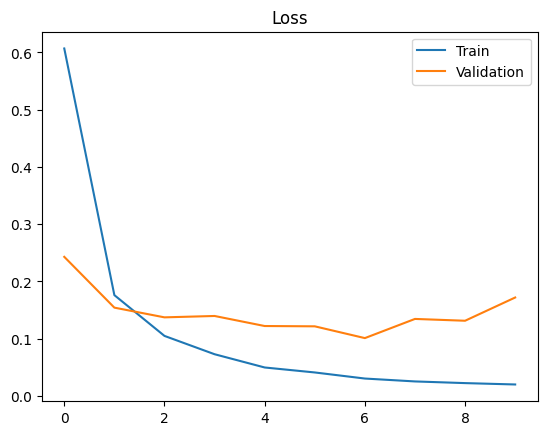

In [87]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

- Display **accuracy** curves:

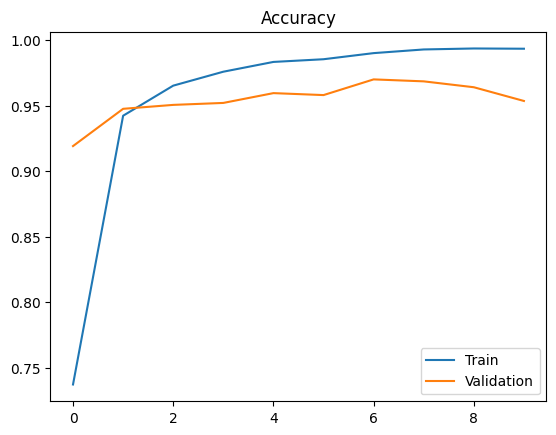

In [88]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

### Step 5 - Evaluate the model

The model is evaluated on test data.

In [89]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", round(test_acc*100, 2))

21/21 [==============================] - 1s 58ms/step - loss: 0.1647 - accuracy: 0.9643
The test loss is:  0.16473519802093506
The best accuracy is:  96.43


### Step 6 - Test the model on a new image

To test your model and predict which classes new images belong to, you can import sounds into a /workspace/data_test folder.

In [90]:

# img

In [91]:
def get_prediction(test_img):
  img = tf.keras.preprocessing.image.load_img(test_img, target_size=(224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = np.array([img_array])

  # generate predictions for samples
  predictions = model.predict(img_array)
  # print(predictions)
  # generate argmax for predictions
  class_id = np.argmax(predictions, axis = 1)
  # print(class_id)
  # transform classes number into classes name
  return(class_names[class_id.item()])


In [92]:
get_prediction("/content/dataset/test/cocci/cocci.1029.jpg")


1/1 [==============================] - 2s 2s/step


'cocci'

**Finetuning**

### Compile and Continue Training The model

### Evaluation and Prediciton

### Step 7 - Save and export the model

>To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (`saved_model` in this example).

You can now save your model in a dedicated folder.

In [93]:
model.save('/content/model')

In [94]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
# my_model directory
%ls /content/model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [96]:
model = tf.keras.models.load_model('/content/model/')
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_2[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                  

In [97]:
# TF_LITE_MODEL_FILE_NAME = "tf_lite_model1.tflite"

# tf_lite_converter = tf.lite.TFLiteConverter.from_saved_model("/content/model/")
# # tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# #tf_lite_converter.target_spec.supported_types = [tf.float16]
# tflite_model = tf_lite_converter.convert()

In [98]:

# Load pretrained MobileNetV2 model
model = model

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
    # This function provides a sample of input data for quantization calibration
    # Typically, you'd use a more representative dataset
    for _ in range(200):
        data = tf.random.normal([1, 224, 224, 3])
        yield [data]

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Pass representative dataset for int8 quantization
converter.representative_dataset = representative_dataset

# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Set the input and output tensors to int8 (APIs added in r2.3)
# converter.inference_input_type = tf.float16
# converter.inference_output_type = tf.float16

quantized_tflite_model = converter.convert()

# Save the model
with open('resnet50_quantized.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [99]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Provide input data
input_data = tf.random.normal([1, 300, 300, 3]).numpy()
interpreter.set_tensor(input_details[0]['index'], input_data.astype(input_details[0]['dtype']))

# Run inference
interpreter.invoke()

# Retrieve the output
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

ValueError: Could not open '/content/model.tflite'.

In [ ]:
# def convert_bytes(size, unit=None):
#     if unit == "KB":
#         return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
#     elif unit == "MB":
#         return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
#     else:
#         return print('File size: ' + str(size) + ' bytes')


# def get_file_size(file_path):
#     size = os.path.getsize(file_path)
#     return size

# tflite_model_name = TF_LITE_MODEL_FILE_NAME
# open(tflite_model_name, "wb").write(tflite_model)
# convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()
# print("Input Shape:", input_details[0]['shape'])
# print("Input Type:", input_details[0]['dtype'])
# print("Output Shape:", output_details[0]['shape'])
# print("Output Type:", output_details[0]['dtype'])

In [ ]:
SAVED_MODEL_DIR = "/content/model/"

In [ ]:


# tf.saved_model.save(
#     model,
#     SAVED_MODEL_DIR,
#     signatures={
#         'train':
#             model.train.get_concrete_function(),
#         'infer':
#             model.infer.get_concrete_function(),
#         'save':
#             model.save.get_concrete_function(),
#         'restore':
#             model.restore.get_concrete_function(),
#     })

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_DIR)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # enable TensorFlow ops.
]
converter.experimental_enable_resource_variables = True
tflite_model = converter.convert()

# Save the model
with open('new_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs.

Train and test this model on your own dataset !

**Adding Metadata**

In [ ]:
pip install tflite_support

In [ ]:
pip install --upgrade absl-py


In [ ]:
!pip install tflite-support-nightly

In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [ ]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "/content/modelnorm.tflite"

# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "/content/labels.txt"
_SAVE_TO_PATH = "new_model2_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 0
_INPUT_NORM_STD = 255

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
# print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)